# Rethorische Fragen und Aussagen #

Hypothese:
Toxic Statements werden oft unter verwendung Verwendung von rethorischen Fragen und Aussagen angebracht. 

Grund für Beschäftigung:
Challenges for Toxic Comment Classification: An In-Depth Error Analysis

TODO: BSP

In [30]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [34]:
question_words = ['wer', 'wie', 'was', 'wieso', 'warum', 'weshalb', 'wo', 'wohin', 'woher', 'wann', 'wen', 'wem', 'woran', 'worauf', 'wozu', 'weswegen']


# als Teilwort
def all(c):
    return True
def containsQuestion(element):
    hasQW = False
    for token in element['tokens']:
        for question_word in question_words:
            if question_word == token.text.lower():
                hasQW = True
        if token.pos_ == 'PUNCT' and token.text != ',':
            if token.text == '?':
                return True
            hasQW = False
    return False
def containsExclamation(element):
    hasQW = False
    for token in element['tokens']:
        for question_word in question_words:
            if question_word == token.text.lower():
                hasQW = True
        if token.pos_ == 'PUNCT' and token.text != ',':
            if token.text == '!':
                return True
            hasQW = False
    return False

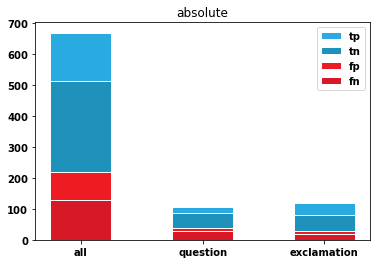

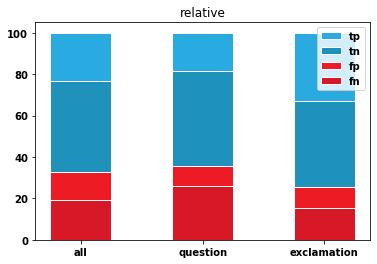

In [103]:
%run ../lib/diagramm_generator.ipynb
diagramFilters = []
# uppercaseFilters.append(('all',generate_filter(0, 2000, uppercaseWords)))
# addFilterInterval(uppercaseFilters, 0, 10, 1, uppercaseWords)
diagramFilters.append(('all', all))
diagramFilters.append(('question', containsQuestion))
diagramFilters.append(('exclamation', containsExclamation))

createPlt(name = "absolute", filters = diagramFilters, relative = False)
createPlt(name = "relative", filters = diagramFilters, relative = True)
# print('All')
# showMetrics(calcMetrics(generate_filter(0, 2000, uppercaseWords)))
# print('1-16')

In [102]:
print('all')
showMetrics(calcMetrics())
print('exclamation')
showMetrics(calcMetrics(diagramFilters[2][1]))
print('exclamation change')
showMetrics(calcMetricDifference(calcMetrics(diagramFilters[2][1])))

all


positiv labels (287),negative labels (383)


,true (452),false (218)
positiv (245),157,88
negativ (425),295,130


accuracy,precision,recall,f1Score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


exclamation


positiv labels (57),negative labels (61)


,true (88),false (30)
positiv (51),39,12
negativ (67),49,18


accuracy,precision,recall,f1Score
0.7457627118644068,0.7647058823529411,0.6842105263157895,0.7222222222222222


exclamation change


positiv labels (281),negative labels (389)


,true (482),false (188)
positiv (245),169,76
negativ (425),313,112


accuracy,precision,recall,f1Score
0.7194029850746269,0.689795918367347,0.6014234875444839,0.6425855513307985
